In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings("ignore")

# DATASET

## Dataset Loading

In [2]:
df=pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


## Checking Out Data set

In [3]:
df['job_title'].value_counts()

job_title
Data Scientist                  13156
Data Engineer                   10883
Software Engineer                9596
Data Analyst                     8652
Machine Learning Engineer        6443
                                ...  
Marketing Data Scientist            1
Business Development Manager        1
Business Insights Manager           1
Platform Data Engineer              1
Customer Success Manager            1
Name: count, Length: 312, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


## Data Cleaning


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.duplicated().sum()

44340

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(44244, 11)

In [10]:
df['work_year'].value_counts()

work_year
2024    27684
2025    10622
2023     4536
2022     1113
2021      214
2020       75
Name: count, dtype: int64

# EDA


In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,44244.000000,4.424400e+04,44244.000000,44244.000000
mean,2024.065952,1.599579e+05,151313.435788,24.941235
std,0.713820,2.673229e+05,77343.097878,43.075374
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.620000e+04,96200.000000,0.000000
50%,2024.000000,1.400000e+05,139200.000000,0.000000
75%,2024.000000,1.920000e+05,190315.000000,50.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


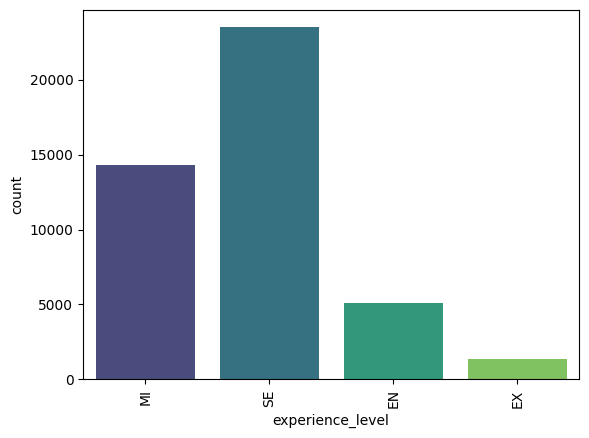

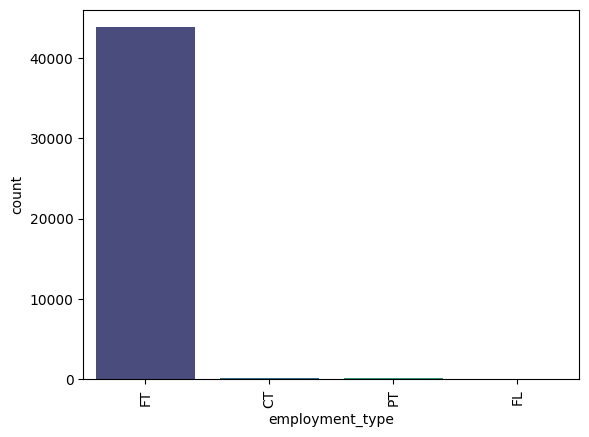

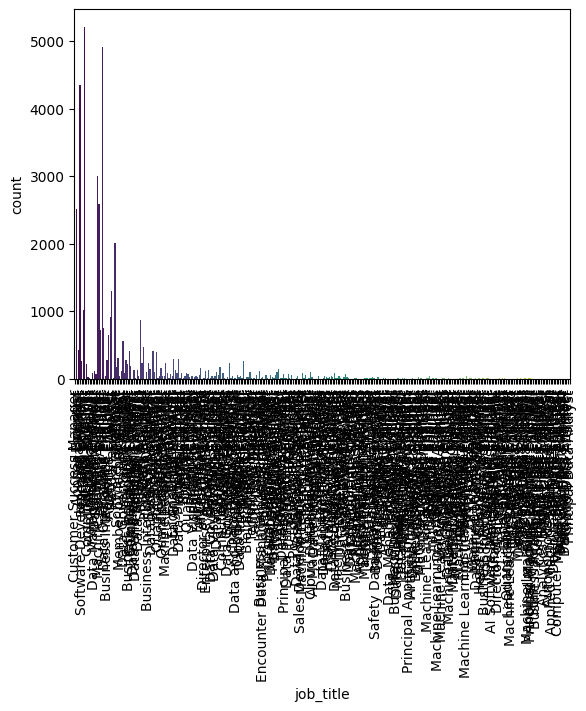

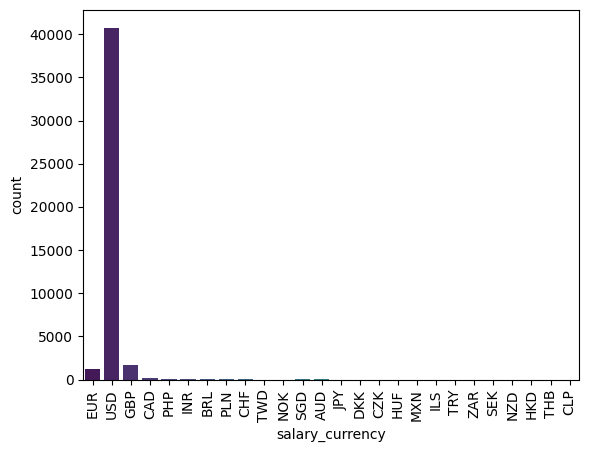

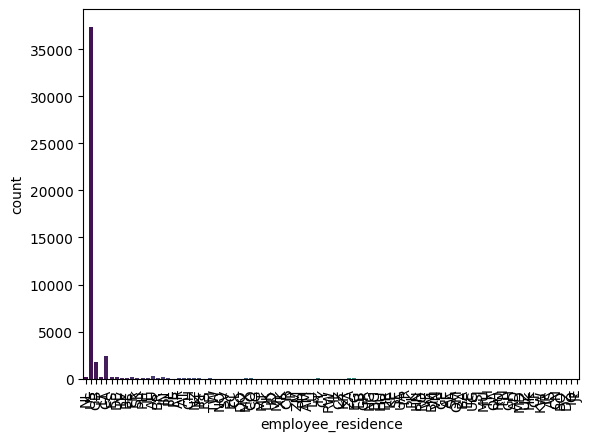

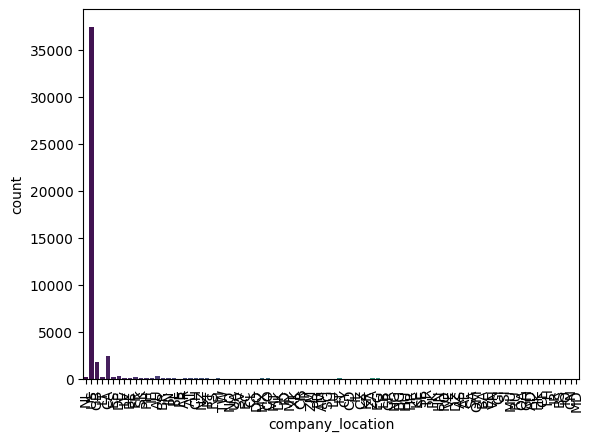

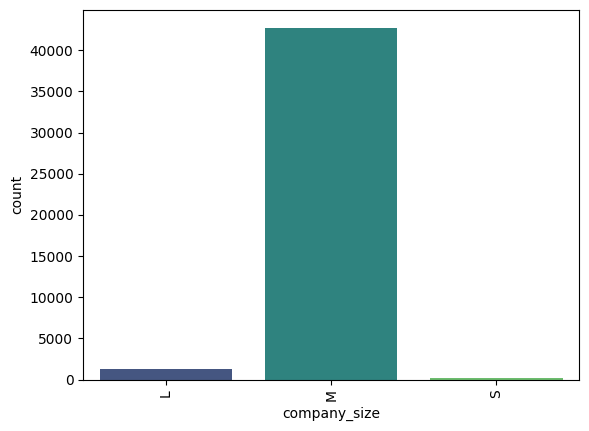

In [12]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.countplot(data=df,x=i,palette="viridis")
        plt.xticks(rotation=90)
        plt.show()

## Distribution of numerical features

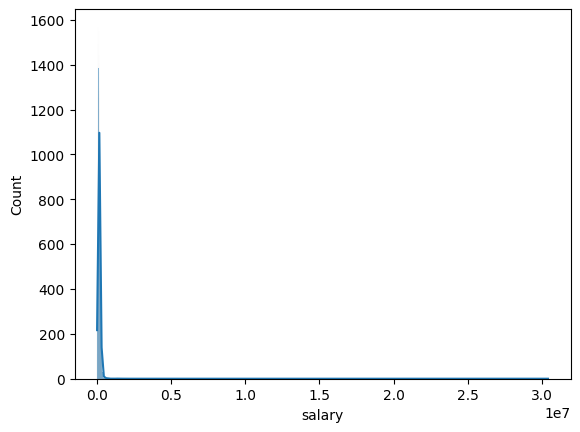

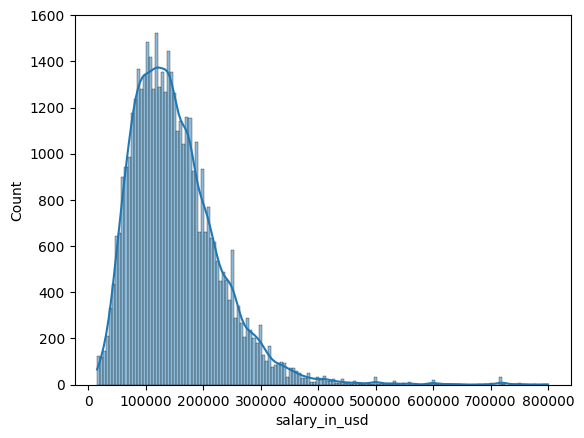

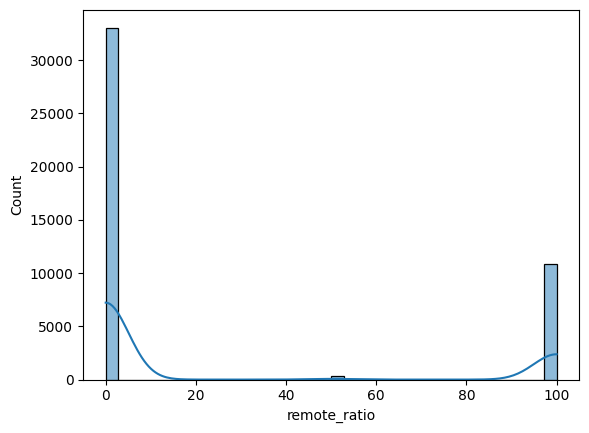

In [13]:
num_columns=['salary','salary_in_usd','remote_ratio']

for i in num_columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

## Highest salary of top 10 jobs

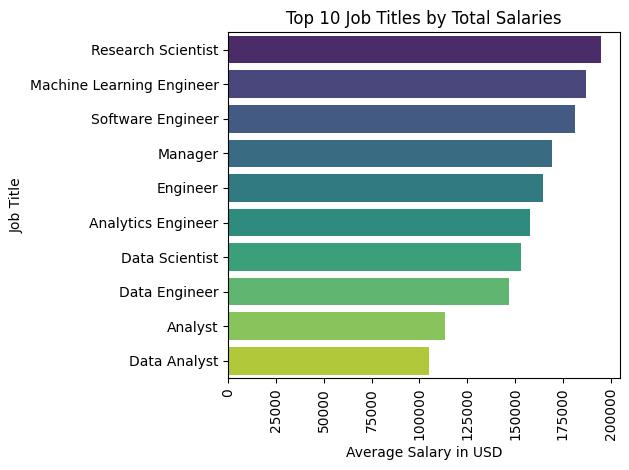

In [14]:
# Get the top 10 job titles based on their count in the dataset
top_10_job_titles = df['job_title'].value_counts().head(10).index.tolist()

# Filter and calculate the average salary for the top 10 job titles
top_10_salaries = df[df['job_title'].isin(top_10_job_titles)].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Plot the results
ax = sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index, palette="viridis")
plt.title("Top 10 Job Titles by Total Salaries")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
# Disable scientific notation
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')  # Ensures plain numbers
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Salary in Usd by Experience Level

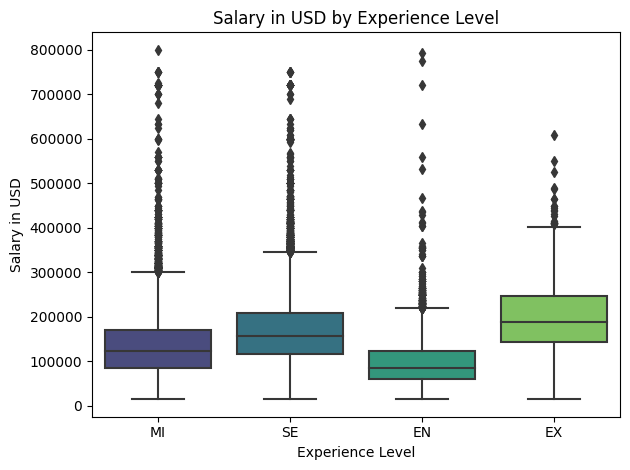

In [15]:
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette="viridis")
plt.title("Salary in USD by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()

## Salary in Usd by Work Year

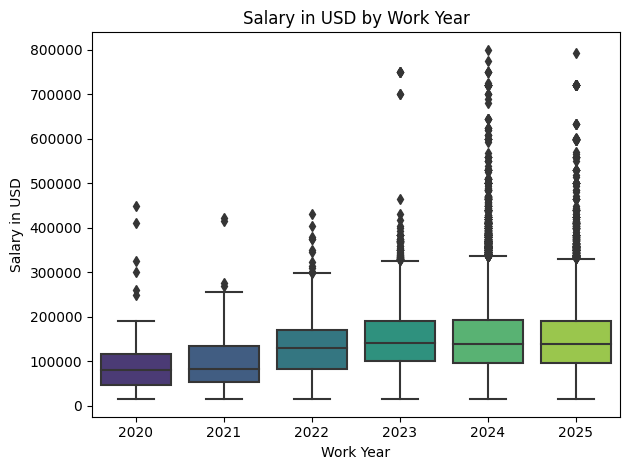

In [16]:
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette="viridis")
plt.title("Salary in USD by Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()

## Salary in Usd by Company Size

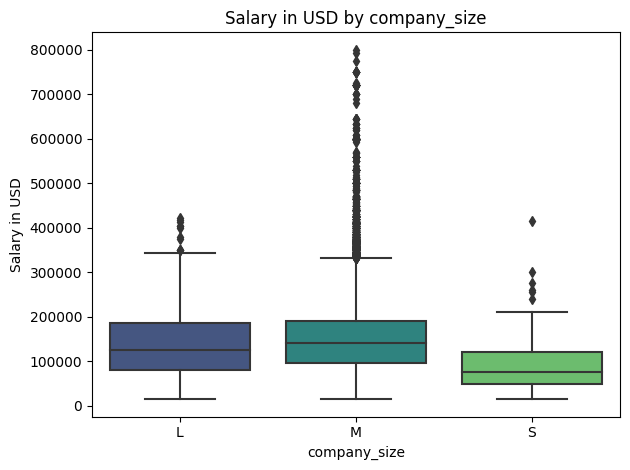

In [17]:
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette="viridis")
plt.title("Salary in USD by company_size")
plt.xlabel("company_size")
plt.ylabel("Salary in USD")
plt.tight_layout()
plt.show()

# Model Building

## Salary in usd predcition

In [18]:
X=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Evaluation:
Mean Squared Error: 4754441618.946555
Mean Absolute Error: 48986.28714000508
R2 Score: 0.2110097819108786
------------------------------
Decision Tree Regressor Evaluation:
Mean Squared Error: 129155283.99299356
Mean Absolute Error: 582.5279692620635
R2 Score: 0.9785669351204331
------------------------------
Random Forest Regressor Evaluation:
Mean Squared Error: 128920203.32410613
Mean Absolute Error: 698.4921166233473
R2 Score: 0.9786059462942112
------------------------------


In [23]:
linear_reg.score(X_test,y_test)

0.2110097819108786

In [24]:
decision_tree.score(X_test,y_test)

0.9785669351204331

In [25]:
random_forest.score(X_test,y_test)

0.9786059462942112

## Random Forrest Regressor with High Accuracy!!

## Please Upvote

## Please Comment IF You have any advice for me